In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common
import ujson as json

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [29]:
fig_dir = '/data/zhenyus/webcachesim/notebook/figures/'

In [2]:
# globally refresh
df = common.load_reports()

In [57]:
marker_map = {
    'Belady': '1',
    'S4LRU': 'd',
    'LFUDA': 'o',
    'LFU': 'o',
    'Adaptive-TinyLFU': 'v',
#     'BeladySample': '#000080',
    'GDBT': '*',
#     'LR': 'r',
    'LRUK': '>',
    
    'GDSF': '8',
    'LRU': 's',
    'FIFO': 's',
    
#     'Hyperbolic': 'chartreuse',
    'LeCaR': 'p',
    'AdaptSize': 'P',
    'LHD': '+',
    'GDWheel': 'x',
    
}

In [58]:
color_map = {
    'Belady': 'k',
#     'BeladySample': '#000080',
    'GDBT': 'b',
#     'LR': 'r',
    'LRUK': 'g',
    'FIFO': 'r',
    'LFUDA': '#808080',
#     'GDSF': 'm',
    'LRU': 'm',
    'LFU': '#808080',
    'S4LRU': 'r',
    'LHD': 'r',
#     'Hyperbolic': 'chartreuse',
    'LeCaR': '#ed740b',
#     'AdaptSize': '#669999',

#     'GDWheel': '#000080',
    'Adaptive-TinyLFU': 'burlywood',
}

In [59]:
def cache_type_to_color(s: str):
    if s in color_map:
        return color_map[s]
    raise Exception(f'color {s} is not defined in color map')

In [3]:
def miss_decouple(df):
    v = json.loads(df.miss_decouple.values[0])
    n_miss = {i[0]: i[1][0]-i[1][2]   for i in v}
    byte_miss = {i[0]: i[1][1]-i[1][3]   for i in v}
    n_request = {i[0]: i[1][0]   for i in v}
    byte_request =  {i[0]: i[1][1]   for i in v}
    bins = np.arange(0, max(n_miss.keys())+1)
    ys = []
    for b in bins:
        if b in n_miss:
            ys.append({'bin_id': b, 'n_miss': n_miss[b], 'n_request': n_request[b], 'byte_miss': byte_miss[b], 'byte_request': byte_request[b]})
        else:
            ys.append({'bin_id': b, 'n_miss': 0, 'n_request': 0, 'byte_miss': 0, 'byte_request': 0})
    return pd.DataFrame.from_records(ys)

In [4]:
def cache_size_decouple(df):
    # TODO: assumpe seg_id and bin_id is continuous
    v = json.loads(df.cache_size_decouple.values[0])
    seg_ids = np.array([i[0][0] for i in v])
    min_sid, max_sid = seg_ids.min(), seg_ids.max()
    bin_ids = np.array([i[0][1] for i in v])
    max_bin_id = bin_ids.max()
    n_cache = {tuple(i[0]): i[1][0] for i in v}
    byte_cache = {tuple(i[0]): i[1][1] for i in v}
    bins = np.arange(0, max_bin_id+1)
    segs = np.arange(min_sid, max_sid+1)
    ys = []
    for b in bins:
        for s in segs:
#             print(s)
#             print(b)
#             print(type(s))
#             print(type(b))
            if (s, b) in n_cache:
                ys.append({'seg_id': s, 'bin_id': b, 'n_cache': n_cache[(s,b)], 'byte_cache': byte_cache[(s,b)]})
            else:
                ys.append({'seg_id': s, 'bin_id': b, 'n_cache': 0, 'byte_cache': 0})
    return pd.DataFrame.from_records(ys).groupby('bin_id').agg({'n_cache': 'mean', 'byte_cache': 'mean'})

In [5]:
trace = 'traceHK.tr'
cache_size = 137438953472
scale 

# df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.cache_type.isin(['Belady', 'LFUDA', 'GDBT']))
    & (df.uni_size == 0)
    & (~pd.isna(df.miss_decouple))
#     & ((df.cache_type != 'LRUK') | (df.k == '4'))
#     & (df.cache_type == 'LRUK')
#     & (df.cache_type == 'GDBT') 
#     & ((df.cache_type != 'GDBT') | ((df.objective == 'byte_hit_rate') & (df.batch_size == '100000')))
    & (df.cache_size == cache_size)
    & (df.n_warmup == 80000000)
)

df1 = df[filter_idx].copy()

In [6]:
df2 = df1[df1['byte_hit_rate'] == df1.groupby('cache_type')['byte_hit_rate'].transform(max)]

In [8]:
for cache_type, grp in df2.groupby('cache_type'):
    assert len(grp) == 1

In [50]:
FONT_SIZE = 40
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

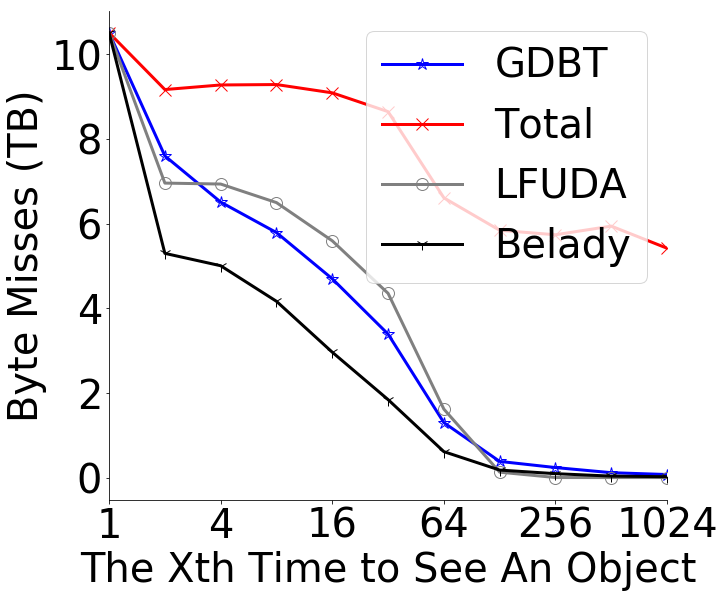

In [66]:
fig, ax = plt.subplots(figsize=(10, 9))
cache_types = ['GDBT', 'LFUDA', 'Belady']
for i, cache_type in enumerate(cache_types):
    df = miss_decouple(df2[df2.cache_type==cache_type])
    ax.semilogx(
        2**df['bin_id'], 
        df['byte_miss']/2**40, 
        label=cache_type,
        c=cache_type_to_color(cache_type), 
        markerfacecolor="None",
        marker=marker_map[cache_type], 
        markersize=12,
        basex=2,
    )
    if i == 0:
        ax.semilogx(
                2**df['bin_id'], 
                df['byte_request']/2**40, 
                label='Total',
                marker='x', 
                markersize=12,
                basex=2,
                c='r'
        )
plt.legend()
plt.xlim([1, 2**10])
ax.set_xticks((1, 4, 16, 64, 256, 1024))
ax.set_xticklabels(('1', '4', '16', '64', '256', '1024'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('The Xth Time to See An Object')
plt.ylabel('Byte Misses (TB)')
plt.savefig(f"{fig_dir}/evaluation_decomposition_byte_miss.pdf",
        bbox_inches = 'tight', 
        pad_inches = 0)
# plt.title(f'{trace}, size={cache_size/1e9}GB')
plt.show()

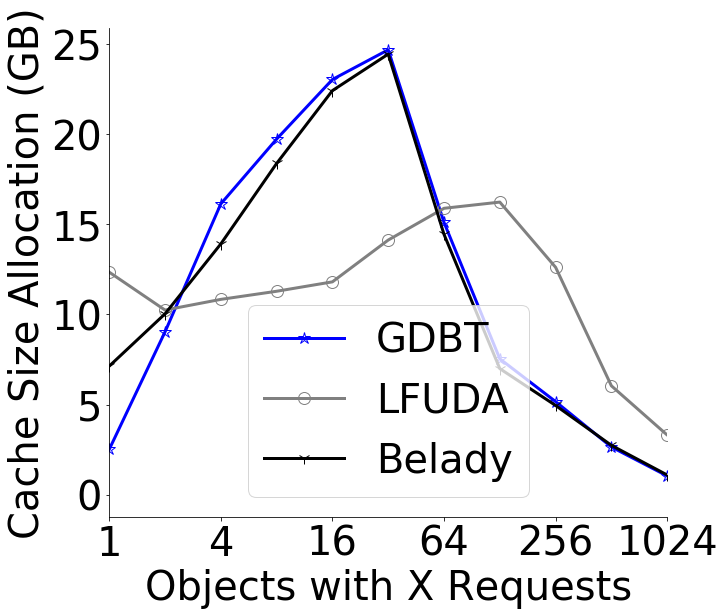

In [67]:
fig, ax = plt.subplots(figsize=(10, 9))
cache_types = ['GDBT', 'LFUDA', 'Belady']
for i, cache_type in enumerate(cache_types):
    df = cache_size_decouple(df2[df2.cache_type==cache_type])
    ax.semilogx(
        2**df.index, 
        df['byte_cache']/2.**30, 
        label=cache_type,
        c=cache_type_to_color(cache_type), 
        markerfacecolor="None",
        marker=marker_map[cache_type], 
        markersize=12,
        basex=2,
    )
plt.legend()
plt.xlim([1, 2**10])
ax.set_xticks((1, 4, 16, 64, 256, 1024))
ax.set_xticklabels(('1', '4', '16', '64', '256', '1024'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Objects with X Requests')
plt.ylabel(f'Cache Size Allocation (GB)')
plt.savefig(f"{fig_dir}/evaluation_decomposition_csize.pdf",
        bbox_inches = 'tight', 
        pad_inches = 0)
plt.show()

In [148]:
trace = 'traceHK.tr'
cache_size = 400000000000

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.cache_type.isin(['Belady', 'LFUDA', 'GDBT']))
    & (df.uni_size == 0)
    & (~pd.isna(df.miss_decouple))
#     & ((df.cache_type != 'LRUK') | (df.k == '4'))
#     & (df.cache_type == 'LRUK')
#     & (df.cache_type == 'GDBT') 
#     & ((df.cache_type != 'GDBT') | ((df.objective == 'byte_hit_rate') & (df.batch_size == '100000')))
    & (df.cache_size == cache_size)
    & (df.n_warmup == 80000000)
)

df1 = df[filter_idx].copy()

In [149]:
df1[df1.cache_type != 'GDBT']

,alpha,base_edwt_window,batch_size,bias_center,bias_point,byte_hit_rate,cache_size,cache_size_decouple,cache_type,cutoff,...,segment_window,simulation_time,static_window,threshold,trace_file,training_sample_interval,uni_size,version,window,zero_cost
7393,NaN,NaN,NaN,NaN,NaN,0.818123,4.000000e+11,"[[[453,24],[2,31020]],[[453,9],[19273,35216813...",Belady,NaN,...,NaN,4783,NaN,NaN,traceHK.tr,NaN,0.0,NaN,NaN,NaN
7408,NaN,NaN,NaN,NaN,NaN,0.726722,4.000000e+11,"[[[453,24],[2,31020]],[[453,9],[31215,91573405...",LFUDA,NaN,...,NaN,5512,NaN,NaN,traceHK.tr,NaN,0.0,NaN,NaN,NaN


In [150]:
df1[(df1.cache_type == 'GDBT') & (df1.byte_hit_rate > 0.74)]

,alpha,base_edwt_window,batch_size,bias_center,bias_point,byte_hit_rate,cache_size,cache_size_decouple,cache_type,cutoff,...,segment_window,simulation_time,static_window,threshold,trace_file,training_sample_interval,uni_size,version,window,zero_cost
7534,NaN,NaN,100000,NaN,NaN,0.741740,4.000000e+11,"[[[453,24],31020],[[453,9],3003467484],[[453,7...",GDBT,NaN,...,NaN,18308,NaN,NaN,traceHK.tr,64,0.0,double_penalty,NaN,NaN
7624,NaN,NaN,400000,NaN,NaN,0.741274,4.000000e+11,"[[[453,24],31020],[[453,9],3129400103],[[453,7...",GDBT,NaN,...,NaN,18117,NaN,NaN,traceHK.tr,64,0.0,double_penalty,NaN,NaN
7625,NaN,NaN,200000,NaN,NaN,0.741668,4.000000e+11,"[[[453,24],31020],[[453,9],3135316652],[[453,7...",GDBT,NaN,...,NaN,18250,NaN,NaN,traceHK.tr,64,0.0,double_penalty,NaN,NaN
7627,NaN,NaN,50000,NaN,NaN,0.741554,4.000000e+11,"[[[453,24],31020],[[453,9],3005515072],[[453,7...",GDBT,NaN,...,NaN,18811,NaN,NaN,traceHK.tr,64,0.0,double_penalty,NaN,NaN
7837,NaN,NaN,100000,NaN,NaN,0.740419,4.000000e+11,"[[[453,24],[2,31020]],[[453,9],[20576,32197435...",GDBT,NaN,...,NaN,39563,NaN,NaN,traceHK.tr,64,0.0,double_penalty,NaN,NaN
9002,NaN,NaN,100000,NaN,NaN,0.741656,4.000000e+11,"[[[453,24],[2,31020]],[[453,9],[20229,29962839...",GDBT,NaN,...,NaN,29747,NaN,NaN,traceHK.tr,64,0.0,double_penalty,NaN,NaN
9032,NaN,NaN,100000,NaN,NaN,0.741404,4.000000e+11,"[[[453,24],[2,31020]],[[453,9],[20643,36309272...",GDBT,NaN,...,NaN,32008,NaN,NaN,traceHK.tr,64,0.0,double_penalty,NaN,NaN


In [151]:
df2 = df1.loc[[7393, 7408, 9002]]

In [152]:
for cache_type, grp in df2.groupby('cache_type'):
    assert len(grp) == 1

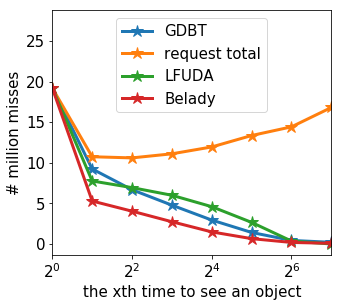

In [153]:
fig, ax = plt.subplots(figsize=(5, 4.5))
cache_types = ['GDBT', 'LFUDA', 'Belady']
for i, cache_type in enumerate(cache_types):
    df = miss_decouple(df2[df2.cache_type==cache_type])
    ax.semilogx(
        2**df['bin_id'], 
        df['n_miss']/1e6, 
        label=cache_type,
        marker='*', 
        markersize=12,
        basex=2,
    )
    if i == 0:
        ax.semilogx(
                2**df['bin_id'], 
                df['n_request']/scale, 
                label='request total',
                marker='*', 
                markersize=12,
                basex=2,
        )
plt.legend()
plt.xlim([1, 2**7])
plt.xlabel('the xth time to see an object')
plt.ylabel('# million misses')
# plt.title(f'{trace}, size={cache_size/1e9}GB')
plt.show()

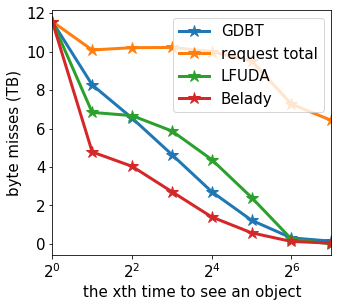

In [154]:
fig, ax = plt.subplots(figsize=(5, 4.5))
cache_types = ['GDBT', 'LFUDA', 'Belady']
for i, cache_type in enumerate(cache_types):
    df = miss_decouple(df2[df2.cache_type==cache_type])
    ax.semilogx(
        2**df['bin_id'], 
        df['byte_miss']/1e12, 
        label=cache_type,
        marker='*', 
        markersize=12,
        basex=2,
    )
    if i == 0:
        ax.semilogx(
                2**df['bin_id'], 
                df['byte_request']/1e12, 
                label='request total',
                marker='*', 
                markersize=12,
                basex=2,
        )
plt.legend()
plt.xlim([1, 2**7])
plt.xlabel('the xth time to see an object')
plt.ylabel('byte misses (TB)')
# plt.title(f'{trace}, size={cache_size/1e9}GB')
plt.show()

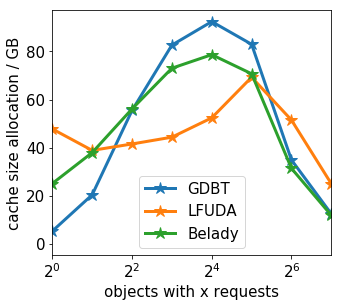

In [155]:
fig, ax = plt.subplots(figsize=(5, 4.5))
cache_types = ['GDBT', 'LFUDA', 'Belady']
for i, cache_type in enumerate(cache_types):
    df = cache_size_decouple(df2[df2.cache_type==cache_type])
    ax.semilogx(
        2**df.index, 
        df['byte_cache']/1e9, 
        label=cache_type,
        marker='*', 
        markersize=12,
        basex=2,
    )
plt.legend()
plt.xlim([1, 2**7])
plt.xlabel('objects with x requests')
plt.ylabel(f'cache size allocation / GB')
# plt.title(f'{trace}, size={cache_size/1e9}GB')
plt.show()